# <b> KNN Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

df = pd.read_csv(os.path.join('NYPD_Arrest_Data_Clean.csv'))
df2 = pd.read_csv(os.path.join('NYPD_Arrest_Data_Clean_Demographics.csv'))

In [3]:
df

,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,WINTER,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,17,0,105,0,40.737043,-73.735514,1,False,False,False,True,False,False,False,True,False
1,4,0,107,71,40.732881,-73.807899,2,False,False,False,True,False,False,False,True,False
2,17,0,48,0,40.855109,-73.892818,3,False,True,False,False,True,False,False,False,False
3,17,0,121,0,40.628967,-74.163275,5,False,True,False,False,False,False,False,False,True
4,17,0,100,0,40.591980,-73.800066,6,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193605,47,1,109,0,40.757691,-73.834115,9,True,False,False,False,False,False,False,True,False
193606,5,1,34,0,40.856808,-73.928265,9,True,False,False,False,False,False,True,False,False
193607,7,0,23,0,40.786116,-73.942614,9,True,False,False,False,False,False,True,False,False
193608,43,1,44,1,40.827812,-73.925929,9,True,False,False,False,True,False,False,False,False


In [4]:
df2

,OFNS_DESC,OFFENSE_LEVEL,ARREST_PRECINCT,JURISDICTION_CODE,Latitude,Longitude,MONTH,FALL,SPRING,SUMMER,...,AGE_GROUP_<18,PERP_SEX_F,PERP_SEX_M,PERP_RACE_AMERICAN INDIAN/ALASKAN NATIVE,PERP_RACE_ASIAN / PACIFIC ISLANDER,PERP_RACE_BLACK,PERP_RACE_BLACK HISPANIC,PERP_RACE_UNKNOWN,PERP_RACE_WHITE,PERP_RACE_WHITE HISPANIC
0,17,0,105,0,40.737043,-73.735514,1,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,4,0,107,71,40.732881,-73.807899,2,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,17,0,48,0,40.855109,-73.892818,3,False,True,False,...,False,False,True,False,False,True,False,False,False,False
3,17,0,121,0,40.628967,-74.163275,5,False,True,False,...,False,False,True,False,False,False,False,False,True,False
4,17,0,100,0,40.591980,-73.800066,6,False,False,True,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193605,47,1,109,0,40.757691,-73.834115,9,True,False,False,...,False,False,True,False,False,False,False,False,False,True
193606,5,1,34,0,40.856808,-73.928265,9,True,False,False,...,False,False,True,False,False,False,False,False,False,True
193607,7,0,23,0,40.786116,-73.942614,9,True,False,False,...,False,False,True,False,False,False,False,False,True,False
193608,43,1,44,1,40.827812,-73.925929,9,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='OFFENSE_LEVEL')
y = df['OFFENSE_LEVEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

X2 = df2.drop(columns='OFFENSE_LEVEL')
y2 = df2['OFFENSE_LEVEL']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1234)

# <b> KNN for Data without Demographics

In [6]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9134858736635504


# <b> KNN for Data with Demographics

In [7]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train2, y_train2)
y_pred2 = knn2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)

print(f'Accuracy with Demographics: {accuracy2}')

Accuracy with Demographics: 0.9025360260317132


# <b> Hyperparameter Tuning

In [13]:
# grid search for KNN model
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,16,2), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, verbose=3)
knn_gscv.fit(X_train, y_train)

knn_gscv.best_params_
knn_gscv.best_score_

print(f'Best KNN Model: {knn_gscv.best_params_}')
print(f'Best KNN Score: {knn_gscv.best_score_}')
# Best KNN Model: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.910 total time=   0.7s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.912 total time=   0.8s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.910 total time=   0.8s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.912 total time=   0.8s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.910 total time=   0.9s
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.910 total time=   0.5s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.912 total time=   0.5s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.910 total time=   0.5s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.912 total time=   0.5s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.910 to

<Axes: title={'center': 'Mean Test Score vs n_neighbors for Manhattan Distance'}, xlabel='param_n_neighbors'>

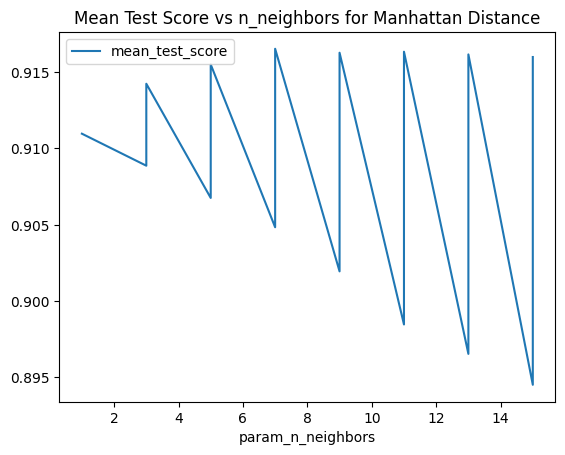

In [16]:
cv_results = knn_gscv.cv_results_
cv_results_df = pd.DataFrame(cv_results)
cv_results_df = cv_results_df[cv_results_df['param_metric'] == 'manhattan']
cv_results_df.plot(x='param_n_neighbors', y='mean_test_score', title='Mean Test Score vs n_neighbors for Manhattan Distance')

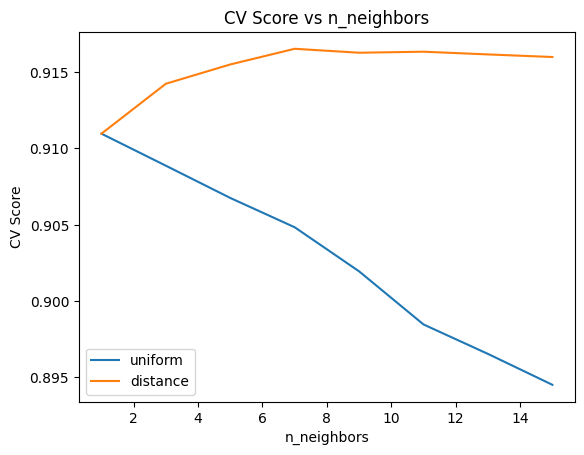

In [15]:
# plot the cv score vs n_neighbors for manhattan distance
# plot uniform weight as blue and distance weight as red
cv_results = knn_gscv.cv_results_
cv_results_df = pd.DataFrame(cv_results)
cv_results_df = cv_results_df[cv_results_df['param_metric'] == 'manhattan']
cv_results_df = cv_results_df[cv_results_df['param_weights'] == 'uniform']
cv_results_df = cv_results_df[['param_n_neighbors', 'mean_test_score']]
cv_results_df = cv_results_df.set_index('param_n_neighbors')
cv_results_df = cv_results_df.rename(columns={'mean_test_score': 'uniform'})

cv_results_df2 = pd.DataFrame(cv_results)
cv_results_df2 = cv_results_df2[cv_results_df2['param_metric'] == 'manhattan']
cv_results_df2 = cv_results_df2[cv_results_df2['param_weights'] == 'distance']
cv_results_df2 = cv_results_df2[['param_n_neighbors', 'mean_test_score']]
cv_results_df2 = cv_results_df2.set_index('param_n_neighbors')
cv_results_df2 = cv_results_df2.rename(columns={'mean_test_score': 'distance'})

cv_results_df = cv_results_df.join(cv_results_df2)
cv_results_df.plot()
plt.title('CV Score vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('CV Score')
plt.show()

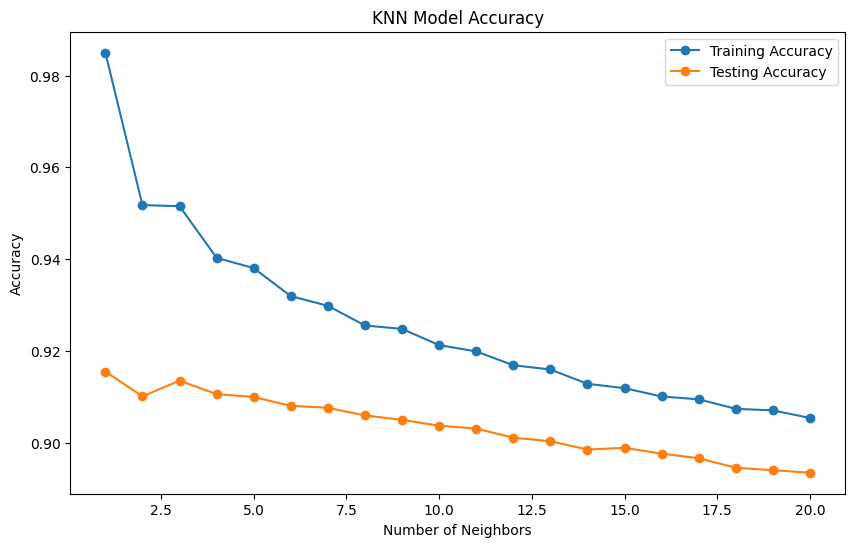

In [17]:
# compare the accuracy on the training and testing sets
train_accuracy = []
test_accuracy = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,21), train_accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1,21), test_accuracy, label='Testing Accuracy', marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.title('KNN Model Accuracy')
plt.legend()
plt.show()

## Demo Hyper

In [20]:
# grid search for KNN model
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,16,2), 'weights': ['distance'], 'metric': ['manhattan']}
knn_gscv2 = GridSearchCV(knn2, param_grid, cv=5, verbose=3)
knn_gscv2.fit(X_train2, y_train2)

print(f'Best KNN Model: {knn_gscv2.best_params_}')
print(f'Best KNN Score: {knn_gscv2.best_score_}')
# Best KNN Model: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.893 total time=   4.9s
[CV 2/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.893 total time=   4.8s
[CV 3/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.896 total time=   4.9s
[CV 4/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.894 total time=   5.0s
[CV 5/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.894 total time=   5.0s
[CV 1/5] END metric=manhattan, n_neighbors=3, weights=distance;, score=0.899 total time=   5.0s
[CV 2/5] END metric=manhattan, n_neighbors=3, weights=distance;, score=0.896 total time=   5.3s
[CV 3/5] END metric=manhattan, n_neighbors=3, weights=distance;, score=0.899 total time=   5.2s
[CV 4/5] END metric=manhattan, n_neighbors=3, weights=distance;, score=0.899 total time=   5.1s
[CV 5/5] END metric=manhattan, n_neighbors=3, weights=distance;, score=0.899

# <b> Analysis, Accuracy, and Metrics

In [21]:
# Best KNN Model: {'metric': 'manhattan', 'n_neighbors': np.int64(7), 'weights': 'distance'}
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

# Best KNN Model
knn2 = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan')
knn2.fit(X_train2, y_train2)
y_pred2 = knn2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)

print(f'Accuracy with Demographics: {accuracy2}')

Accuracy: 0.9208202055678942
Accuracy with Demographics: 0.9039994490642701


In [24]:
# create confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

confusion_matrix(y_test2, y_pred2)

# create classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     24823
           1       0.94      0.93      0.93     32721
           2       0.85      0.67      0.75       539

    accuracy                           0.92     58083
   macro avg       0.90      0.84      0.86     58083
weighted avg       0.92      0.92      0.92     58083

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     24823
           1       0.92      0.92      0.92     32721
           2       0.87      0.48      0.62       539

    accuracy                           0.90     58083
   macro avg       0.89      0.76      0.81     58083
weighted avg       0.90      0.90      0.90     58083



In [42]:
# Generate classification report
report = classification_report(y_test, y_pred, digits=2, output_dict=True)
df = pd.DataFrame(report).T

# Convert support column to integer
df['support'] = df['support'].apply(int)

# Apply background gradient
styled_df = df.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['0':'9', :'f1-score'])

# Display the styled DataFrame
styled_df

,precision,recall,f1-score,support
0,0.902744,0.917254,0.909941,24823
1,0.935837,0.927600,0.931700,32721
2,0.848131,0.673469,0.750776,539
accuracy,0.920820,0.920820,0.920820,0
macro avg,0.895570,0.839441,0.864139,58083
weighted avg,0.920880,0.920820,0.920722,58083


In [43]:
# Generate classification report
report = classification_report(y_test2, y_pred2, digits=2, output_dict=True)
df = pd.DataFrame(report).T

# Convert support column to integer
df['support'] = df['support'].apply(int)

# Apply background gradient
styled_df = df.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['0':'9', :'f1-score'])

# Display the styled DataFrame
styled_df

,precision,recall,f1-score,support
0,0.888982,0.894533,0.891749,24823
1,0.915780,0.918187,0.916982,32721
2,0.865772,0.478664,0.616487,539
accuracy,0.903999,0.903999,0.903999,0
macro avg,0.890178,0.763795,0.808406,58083
weighted avg,0.903863,0.903999,0.903410,58083
